Libraries/Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Preprocessing Data

In [2]:
datmin = pd.read_csv('data.csv', sep=";")
datmin.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [3]:
datmin.describe()

NameError: name 'datmin' is not defined

In [ ]:
datmin = datmin.drop(columns='No_Pesanan')

In [ ]:
print(datmin)

     Status_Pesanan       No_Resi Opsi_Pengiriman Antar_ke_counter/_pick-up  \
0           Selesai  JP1064395945     J&T Express          Antar ke Counter   
1           Selesai  JP5512940727     J&T Express          Antar ke Counter   
2           Selesai  JP8305098995     J&T Express          Antar ke Counter   
3           Selesai  JP8305098995     J&T Express          Antar ke Counter   
4           Selesai  JP7089822115     J&T Express          Antar ke Counter   
...             ...           ...             ...                       ...   
1024        Selesai  JP7417287925     J&T Express          Antar ke Counter   
1025        Selesai  JP8645526250     J&T Express          Antar ke Counter   
1026        Selesai  JP2664834557     J&T Express          Antar ke Counter   
1027        Selesai  JP2851659973     J&T Express          Antar ke Counter   
1028        Selesai  JP2851659973     J&T Express          Antar ke Counter   

     Pesanan_Harus_Dikirimkan_Sebelum_Menghindari_k

In [ ]:
datmin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SKU_Induk,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nomor_Referensi_SKU,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumlah,1029.0,1.208941,0.969414,1.0,1.0,1.0,1.0,25.0
Jumlah_Produk_di_Pesan,1029.0,2.154519,2.128743,1.0,1.0,1.0,3.0,27.0
Potongan_Koin_Shopee,1029.0,2071.445092,9658.639067,0.0,0.0,0.0,0.0,107161.0
Catatan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
datmin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Status_Pesanan                                              1029 non-null   object 
 1   No_Resi                                                     1029 non-null   object 
 2   Opsi_Pengiriman                                             1029 non-null   object 
 3   Antar_ke_counter/_pick-up                                   1029 non-null   object 
 4   Pesanan_Harus_Dikirimkan_Sebelum_Menghindari_keterlambatan  1029 non-null   object 
 5   Waktu_Pengiriman_Diatur                                     1026 non-null   object 
 6   Waktu_Pesanan_Dibuat                                        1029 non-null   object 
 7   Waktu_Pembayaran_Dilakukan                                  1029 non-null   object 
 8 

In [ ]:
datmin['Perkiraan_Ongkos_Kirim'] = datmin['Perkiraan_Ongkos_Kirim'].str.replace('Rp', '', regex=False)
datmin['Perkiraan_Ongkos_Kirim'] = datmin['Perkiraan_Ongkos_Kirim'].str.replace('.', '', regex=False)
datmin['Perkiraan_Ongkos_Kirim']

0       10000
1       40000
2       60000
3       60000
4       30000
        ...  
1024    10000
1025    10000
1026    30000
1027    30000
1028    30000
Name: Perkiraan_Ongkos_Kirim, Length: 1029, dtype: object

In [ ]:
datmin['Perkiraan_Ongkos_Kirim'] = datmin['Perkiraan_Ongkos_Kirim'].astype(int)

In [ ]:
datmin['Total_Pembayaran'] = datmin['Total_Pembayaran'].replace({'Rp': '', '\.':''}, regex=True).astype(int)
datmin

,Status_Pesanan,No_Resi,Opsi_Pengiriman,Antar_ke_counter/_pick-up,Pesanan_Harus_Dikirimkan_Sebelum_Menghindari_keterlambatan,Waktu_Pengiriman_Diatur,Waktu_Pesanan_Dibuat,Waktu_Pembayaran_Dilakukan,SKU_Induk,Nama_Produk,...,Perkiraan_Ongkos_Kirim,Catatan_dari_Pembeli,Catatan,Username_Pembeli,Nama_Penerima,No_Telepon,Alamat_Pengiriman,Kota/Kabupaten,Provinsi,Waktu_Pesanan_Selesai
0,Selesai,JP1064395945,J&T Express,Antar ke Counter,01/05/2021 00:22,01/02/2021 13:20,01/01/2021 00:18,01/01/2021 00:22,NaN,Ready Set Sutil Free Tatakan dan Hook Set suti...,...,10000,NaN,NaN,harifree,T**i,******24,Pe******,KAB. BEKASI,JAWA BARAT,01/03/2021 14:49
1,Selesai,JP5512940727,J&T Express,Antar ke Counter,01/05/2021 00:21,01/02/2021 13:20,01/01/2021 00:21,01/01/2021 00:21,NaN,New Oil Bottle Botol Minyak Oil Pot,...,40000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
2,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,Stewing Soup Panci Kaca Glass Pan,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
3,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,New Oil Bottle Botol Minyak Oil Pot,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
4,Selesai,JP7089822115,J&T Express,Antar ke Counter,01/05/2021 04:25,01/02/2021 13:20,01/01/2021 04:24,01/01/2021 04:25,NaN,Set Pisau Keramik Tabung Set Pisau Dapur Set P...,...,30000,NaN,NaN,rinawendo,R******u,******57,Jl******,KAB. BANDUNG BARAT,JAWA BARAT,01/04/2021 18:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Selesai,JP7417287925,J&T Express,Antar ke Counter,02/02/2021 09:14,02/01/2021 17:01,1/31/21 9:13,1/31/21 9:14,NaN,Set Teh Gula Kopi Canister Set Seasoning Jar,...,10000,NaN,NaN,fransiscataniatrixie,L**i,******00,Jl******,KOTA DEPOK,JAWA BARAT,02/04/2021 05:06
1025,Selesai,JP8645526250,J&T Express,Antar ke Counter,02/02/2021 09:34,02/01/2021 17:02,1/31/21 9:34,1/31/21 9:34,NaN,New Oil Bottle Botol Minyak Oil Pot,...,10000,NaN,NaN,rikaasnensi,N******i,******77,Pe******,KOTA TANGERANG,BANTEN,02/04/2021 05:08
1026,Selesai,JP2664834557,J&T Express,Antar ke Counter,02/02/2021 09:43,02/01/2021 20:42,1/31/21 9:43,1/31/21 9:43,NaN,Panci Keramik Minimalis Ceramik Milk Pan Panci...,...,30000,NaN,NaN,diyah2608,D******),******65,De******,KAB. CIREBON,JAWA BARAT,02/02/2021 14:34
1027,Selesai,JP2851659973,J&T Express,Antar ke Counter,02/02/2021 09:53,02/01/2021 22:00,1/31/21 9:53,1/31/21 9:53,NaN,Mini Refrigator Box Food Storage Container Foo...,...,30000,NaN,NaN,sepvaniputri,V**i,******47,Ta******,KOTA JAKARTA BARAT,DKI JAKARTA,02/04/2021 04:24


In [ ]:
datmin['Total_Harga_Produk'] = datmin['Total_Harga_Produk'].replace({'Rp': '', '\.':''}, regex=True).astype(int)
datmin

,Status_Pesanan,No_Resi,Opsi_Pengiriman,Antar_ke_counter/_pick-up,Pesanan_Harus_Dikirimkan_Sebelum_Menghindari_keterlambatan,Waktu_Pengiriman_Diatur,Waktu_Pesanan_Dibuat,Waktu_Pembayaran_Dilakukan,SKU_Induk,Nama_Produk,...,Perkiraan_Ongkos_Kirim,Catatan_dari_Pembeli,Catatan,Username_Pembeli,Nama_Penerima,No_Telepon,Alamat_Pengiriman,Kota/Kabupaten,Provinsi,Waktu_Pesanan_Selesai
0,Selesai,JP1064395945,J&T Express,Antar ke Counter,01/05/2021 00:22,01/02/2021 13:20,01/01/2021 00:18,01/01/2021 00:22,NaN,Ready Set Sutil Free Tatakan dan Hook Set suti...,...,10000,NaN,NaN,harifree,T**i,******24,Pe******,KAB. BEKASI,JAWA BARAT,01/03/2021 14:49
1,Selesai,JP5512940727,J&T Express,Antar ke Counter,01/05/2021 00:21,01/02/2021 13:20,01/01/2021 00:21,01/01/2021 00:21,NaN,New Oil Bottle Botol Minyak Oil Pot,...,40000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
2,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,Stewing Soup Panci Kaca Glass Pan,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
3,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,New Oil Bottle Botol Minyak Oil Pot,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
4,Selesai,JP7089822115,J&T Express,Antar ke Counter,01/05/2021 04:25,01/02/2021 13:20,01/01/2021 04:24,01/01/2021 04:25,NaN,Set Pisau Keramik Tabung Set Pisau Dapur Set P...,...,30000,NaN,NaN,rinawendo,R******u,******57,Jl******,KAB. BANDUNG BARAT,JAWA BARAT,01/04/2021 18:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Selesai,JP7417287925,J&T Express,Antar ke Counter,02/02/2021 09:14,02/01/2021 17:01,1/31/21 9:13,1/31/21 9:14,NaN,Set Teh Gula Kopi Canister Set Seasoning Jar,...,10000,NaN,NaN,fransiscataniatrixie,L**i,******00,Jl******,KOTA DEPOK,JAWA BARAT,02/04/2021 05:06
1025,Selesai,JP8645526250,J&T Express,Antar ke Counter,02/02/2021 09:34,02/01/2021 17:02,1/31/21 9:34,1/31/21 9:34,NaN,New Oil Bottle Botol Minyak Oil Pot,...,10000,NaN,NaN,rikaasnensi,N******i,******77,Pe******,KOTA TANGERANG,BANTEN,02/04/2021 05:08
1026,Selesai,JP2664834557,J&T Express,Antar ke Counter,02/02/2021 09:43,02/01/2021 20:42,1/31/21 9:43,1/31/21 9:43,NaN,Panci Keramik Minimalis Ceramik Milk Pan Panci...,...,30000,NaN,NaN,diyah2608,D******),******65,De******,KAB. CIREBON,JAWA BARAT,02/02/2021 14:34
1027,Selesai,JP2851659973,J&T Express,Antar ke Counter,02/02/2021 09:53,02/01/2021 22:00,1/31/21 9:53,1/31/21 9:53,NaN,Mini Refrigator Box Food Storage Container Foo...,...,30000,NaN,NaN,sepvaniputri,V**i,******47,Ta******,KOTA JAKARTA BARAT,DKI JAKARTA,02/04/2021 04:24


In [ ]:
datmin['Total_Diskon'] = datmin['Total_Diskon'].replace({'Rp': '', '\.':''}, regex=True).astype(int)
datmin

,Status_Pesanan,No_Resi,Opsi_Pengiriman,Antar_ke_counter/_pick-up,Pesanan_Harus_Dikirimkan_Sebelum_Menghindari_keterlambatan,Waktu_Pengiriman_Diatur,Waktu_Pesanan_Dibuat,Waktu_Pembayaran_Dilakukan,SKU_Induk,Nama_Produk,...,Perkiraan_Ongkos_Kirim,Catatan_dari_Pembeli,Catatan,Username_Pembeli,Nama_Penerima,No_Telepon,Alamat_Pengiriman,Kota/Kabupaten,Provinsi,Waktu_Pesanan_Selesai
0,Selesai,JP1064395945,J&T Express,Antar ke Counter,01/05/2021 00:22,01/02/2021 13:20,01/01/2021 00:18,01/01/2021 00:22,NaN,Ready Set Sutil Free Tatakan dan Hook Set suti...,...,10000,NaN,NaN,harifree,T**i,******24,Pe******,KAB. BEKASI,JAWA BARAT,01/03/2021 14:49
1,Selesai,JP5512940727,J&T Express,Antar ke Counter,01/05/2021 00:21,01/02/2021 13:20,01/01/2021 00:21,01/01/2021 00:21,NaN,New Oil Bottle Botol Minyak Oil Pot,...,40000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
2,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,Stewing Soup Panci Kaca Glass Pan,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
3,Selesai,JP8305098995,J&T Express,Antar ke Counter,01/05/2021 00:23,01/02/2021 13:20,01/01/2021 00:23,01/01/2021 00:23,NaN,New Oil Bottle Botol Minyak Oil Pot,...,60000,NaN,NaN,naila.id,C******a,******55,Vi******,KOTA SURABAYA,JAWA TIMUR,01/04/2021 10:40
4,Selesai,JP7089822115,J&T Express,Antar ke Counter,01/05/2021 04:25,01/02/2021 13:20,01/01/2021 04:24,01/01/2021 04:25,NaN,Set Pisau Keramik Tabung Set Pisau Dapur Set P...,...,30000,NaN,NaN,rinawendo,R******u,******57,Jl******,KAB. BANDUNG BARAT,JAWA BARAT,01/04/2021 18:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Selesai,JP7417287925,J&T Express,Antar ke Counter,02/02/2021 09:14,02/01/2021 17:01,1/31/21 9:13,1/31/21 9:14,NaN,Set Teh Gula Kopi Canister Set Seasoning Jar,...,10000,NaN,NaN,fransiscataniatrixie,L**i,******00,Jl******,KOTA DEPOK,JAWA BARAT,02/04/2021 05:06
1025,Selesai,JP8645526250,J&T Express,Antar ke Counter,02/02/2021 09:34,02/01/2021 17:02,1/31/21 9:34,1/31/21 9:34,NaN,New Oil Bottle Botol Minyak Oil Pot,...,10000,NaN,NaN,rikaasnensi,N******i,******77,Pe******,KOTA TANGERANG,BANTEN,02/04/2021 05:08
1026,Selesai,JP2664834557,J&T Express,Antar ke Counter,02/02/2021 09:43,02/01/2021 20:42,1/31/21 9:43,1/31/21 9:43,NaN,Panci Keramik Minimalis Ceramik Milk Pan Panci...,...,30000,NaN,NaN,diyah2608,D******),******65,De******,KAB. CIREBON,JAWA BARAT,02/02/2021 14:34
1027,Selesai,JP2851659973,J&T Express,Antar ke Counter,02/02/2021 09:53,02/01/2021 22:00,1/31/21 9:53,1/31/21 9:53,NaN,Mini Refrigator Box Food Storage Container Foo...,...,30000,NaN,NaN,sepvaniputri,V**i,******47,Ta******,KOTA JAKARTA BARAT,DKI JAKARTA,02/04/2021 04:24


In [ ]:
#cek missing value
total=datmin.isnull().sum().sort_values(ascending = False)
print(total)

Catatan                                                       1029
SKU_Induk                                                     1029
Nomor_Referensi_SKU                                           1029
Catatan_dari_Pembeli                                           933
Nama_Variasi                                                   286
Waktu_Pengiriman_Diatur                                          3
Username_Pembeli                                                 3
Total_Pembayaran                                                 0
Paket_Diskon_Diskon_dari_Shopee                                  0
Paket_Diskon_(Diskon_dari_Penjual)                               0
Potongan_Koin_Shopee                                             0
Diskon_Kartu_Kredit                                              0
Ongkos_Kirim_Dibayar_oleh_Pembeli                                0
Estimasi_Potongan_Biaya_Pengiriman                               0
Ongkos_Kirim_Pengembalian_Barang                              

In [ ]:
data_penjualan = ["100", "200", "300", "400"]
harga_awal = ["10", "20", "30", "40"]

# Mengonversi data penjualan menjadi integer
data_penjualan_integer = [int(i) for i in data_penjualan]

# Mengonversi harga barang menjadi integer
harga_awal_integer = [int(i) for i in harga_awal]


Pemodelan dan Visualisasi

Pertanyaan 1: 5 Kota/Kabupaten dengan jumlah pesanan terbanyak?

In [ ]:
# Menggunakan pandas untuk mengolah data
import pandas as pd

# Menghitung jumlah pesanan per kota/kabupaten
jumlah_pesanan_kota = datmin['Kota/Kabupaten'].value_counts()

# Mendapatkan 5 kota/kabupaten dengan jumlah pesanan terbanyak
top_5_kota = jumlah_pesanan_kota.head(5)

# Mencetak 5 kota/kabupaten dengan jumlah pesanan terbanyak
for i, (kota, jumlah_pesanan) in enumerate(top_5_kota.items(), start=1):
    print(f"{i}\n{kota}: {jumlah_pesanan}\n")

1
KOTA JAKARTA TIMUR: 85

2
KOTA JAKARTA SELATAN: 60

3
KOTA TANGERANG SELATAN: 57

4
KOTA BEKASI: 52

5
KOTA JAKARTA BARAT: 50



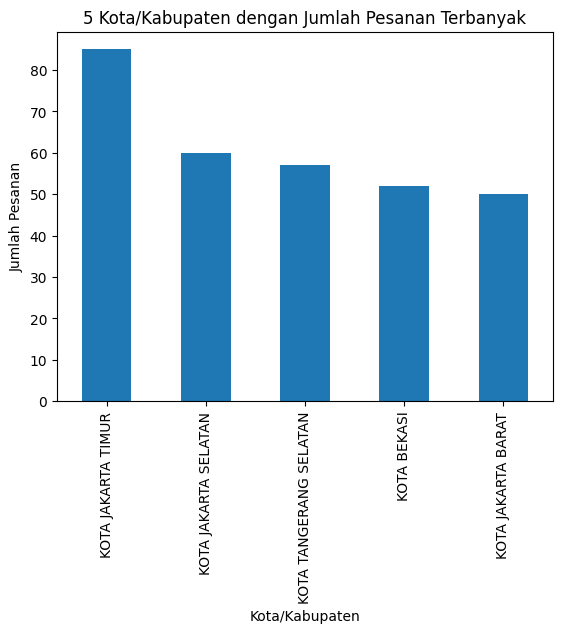

In [ ]:
import matplotlib.pyplot as plt

# Menggunakan pandas untuk mengolah data
import pandas as pd

# Menghitung jumlah pesanan per kota/kabupaten
jumlah_pesanan_kota = datmin['Kota/Kabupaten'].value_counts()

# Mendapatkan 5 kota/kabupaten dengan jumlah pesanan terbanyak
top_5_kota = jumlah_pesanan_kota.head(5)

# Membuat bar plot
top_5_kota.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Kota/Kabupaten dengan Jumlah Pesanan Terbanyak')
plt.xlabel('Kota/Kabupaten')
plt.ylabel('Jumlah Pesanan')

# Menampilkan plot
plt.show()


Pertanyaan 2: 5 Kota/Kabupaten dengan jumlah pesanan terendah?

In [ ]:
# Menggunakan pandas untuk mengolah data
import pandas as pd

# Menghitung jumlah pesanan per kota/kabupaten
jumlah_pesanan_kota = datmin['Kota/Kabupaten'].value_counts()

# Mendapatkan 5 kota/kabupaten dengan jumlah pesanan terendah
bottom_5_kota = jumlah_pesanan_kota.tail(5)

# Mencetak 5 kota/kabupaten dengan jumlah pesanan terendah
for i, (kota, jumlah_pesanan) in enumerate(bottom_5_kota.items(), start=1):
    print(f"{i}\n{kota}: {jumlah_pesanan}\n")

1
KAB. SUMBAWA: 1

2
KAB. WONOSOBO: 1

3
KAB. KUDUS: 1

4
KAB. BATANG: 1

5
KAB. MADIUN: 1



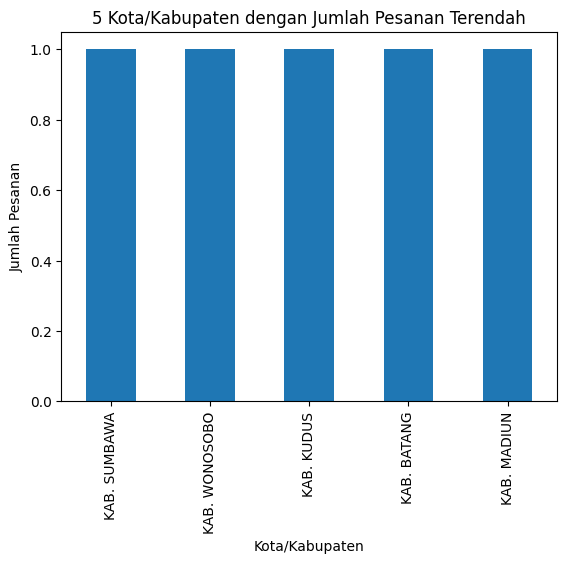

In [ ]:
import matplotlib.pyplot as plt

# Menggunakan pandas untuk mengolah data
import pandas as pd

# Menghitung jumlah pesanan per kota/kabupaten
jumlah_pesanan_kota = datmin['Kota/Kabupaten'].value_counts()

# Mendapatkan 5 kota/kabupaten dengan jumlah pesanan terendah
bottom_5_kota = jumlah_pesanan_kota.tail(5)

# Membuat bar plot
bottom_5_kota.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Kota/Kabupaten dengan Jumlah Pesanan Terendah')
plt.xlabel('Kota/Kabupaten')
plt.ylabel('Jumlah Pesanan')

# Menampilkan plot
plt.show()

Pertanyaan 3: Berapa total penjualan produk "Stewing Soup Panci Kaca Glass Pan" selama bulan 01?


In [ ]:
# Mengubah kolom 'Waktu_Pesanan_Dibuat' menjadi datetime
datmin['Waktu_Pesanan_Dibuat'] = pd.to_datetime(datmin['Waktu_Pesanan_Dibuat'])

# Membuat mask untuk produk 'Stewing Soup Panci Kaca Glass Pan' dan bulan '01'
mask = (datmin['Nama_Produk'] == 'Stewing Soup Panci Kaca Glass Pan') & (datmin['Waktu_Pesanan_Dibuat'].dt.month == 1)

# Menghitung total penjualan produk tersebut pada bulan 01
total_penjualan = datmin.loc[mask, 'Jumlah'].sum()

# Mencetak total penjualan
print(f"1\nStewing Soup Panci Kaca Glass Pan\n{total_penjualan}\n")


1
Stewing Soup Panci Kaca Glass Pan
86



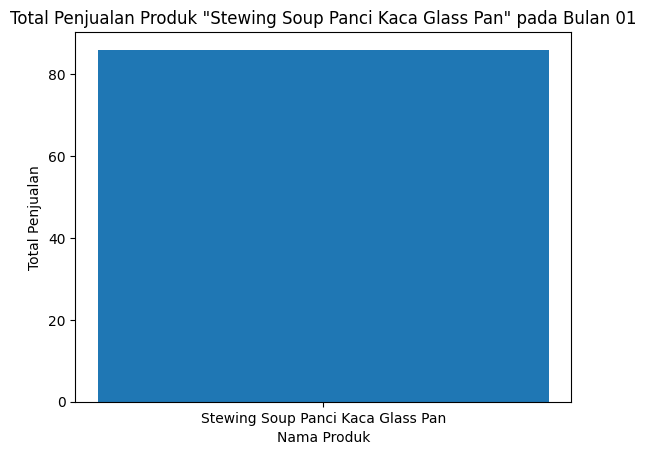

In [ ]:
import matplotlib.pyplot as plt

# Mengubah kolom 'Waktu_Pesanan_Dibuat' menjadi datetime
datmin['Waktu_Pesanan_Dibuat'] = pd.to_datetime(datmin['Waktu_Pesanan_Dibuat'])

# Membuat mask untuk produk 'Stewing Soup Panci Kaca Glass Pan' dan bulan '01'
mask = (datmin['Nama_Produk'] == 'Stewing Soup Panci Kaca Glass Pan') & (datmin['Waktu_Pesanan_Dibuat'].dt.month == 1)

# Menghitung total penjualan produk tersebut pada bulan 01
total_penjualan = datmin.loc[mask, 'Jumlah'].sum()

# Membuat bar plot
plt.bar('Stewing Soup Panci Kaca Glass Pan', total_penjualan)

# Menambahkan judul dan label
plt.title('Total Penjualan Produk "Stewing Soup Panci Kaca Glass Pan" pada Bulan 01')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan')

# Menampilkan plot
plt.show()

Pertanyaan 4: Berapa jumlah produk yang dikirim dengan opsi pengiriman J&T Express?


In [ ]:
# Membuat mask untuk opsi pengiriman 'J&T Express'
mask = datmin['Opsi_Pengiriman'] == 'J&T Express'

# Menghitung jumlah produk yang dikirim dengan opsi pengiriman 'J&T Express'
jumlah_produk = datmin.loc[mask, 'Nama_Produk'].value_counts()

# Mencetak 5 produk teratas dengan jumlah terbanyak
for i, (produk, jumlah) in enumerate(jumlah_produk.items(), start=1):
    print(f"{i}\n{produk}\n{jumlah}\n")


1
Cetakan Telur Wajan Telur Wajan Pancake Pancake Pan Omlette Pan
83

2
Pot Minyak Kaleng Minyal Saringan Minyak Penyaring Minyak Wadah Minyak Oil Tank Oil Bottle
71

3
Set Pisau Keramik Tabung Set Pisau Dapur Set Pisau Pisau Dapur Pisau Set
70

4
Stewing Soup Panci Kaca Glass Pan
55

5
Ready Set Sutil Free Tatakan dan Hook Set sutil Set Spatula Spatula Set Set Alat Masak
41

6
Panci Keramik Minimalis Ceramik Milk Pan Panci Anti Lengket Panci Sayur Panci Plus Steamer
34

7
Transparan Storage  Box Serbaguna Acrylic Storage Storage Akrilik Box Akrilik Kotak Akrilik
27

8
Tableware Set Storage Tempat Sendok Spoon Hanger
26

9
New Oil Bottle Botol Minyak Oil Pot
26

10
Oil Bottle Tempat Minyak Oil Stoper Botol Minyak
18

11
100rb dapat 3pcs good morning Gelas Kaca Gelas Minum Mug Kaca Gelas Cantik
18

12
Omlette Pan Marble Ceramic Pan Wajan Telur Ceramic Omlette Pan Wajan
18

13
Frying Pan Marble Putih
14

14
Tissue HL Temlat Tissue Kayu Tempay Tisu Tissue Box Kotak Tissue
14

15
Rak Dapur

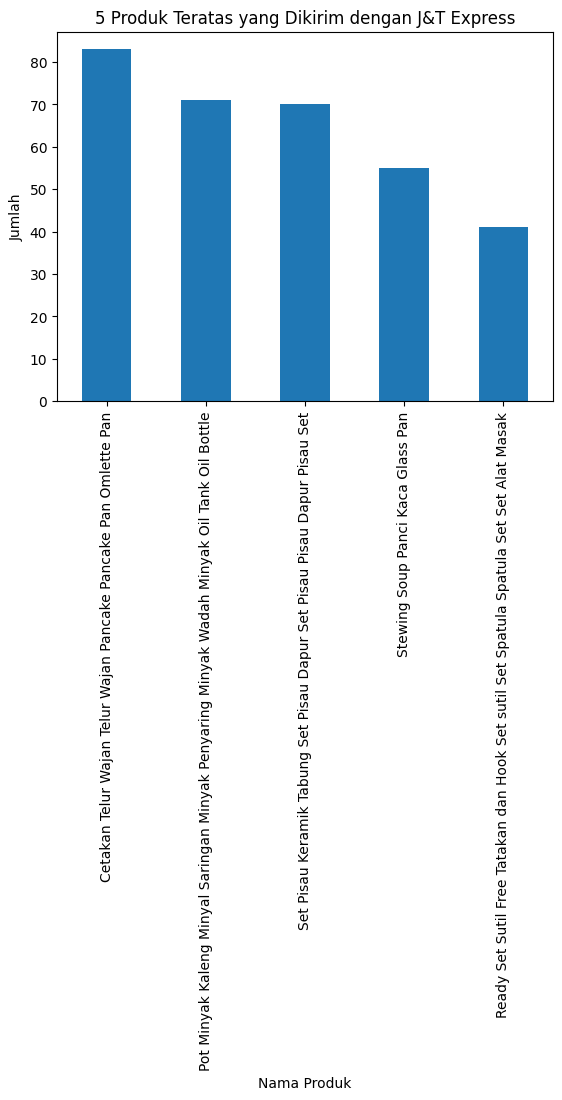

In [ ]:
import matplotlib.pyplot as plt

# Membuat mask untuk opsi pengiriman 'J&T Express'
mask = datmin['Opsi_Pengiriman'] == 'J&T Express'

# Menghitung jumlah produk yang dikirim dengan opsi pengiriman 'J&T Express'
jumlah_produk = datmin.loc[mask, 'Nama_Produk'].value_counts()

# Mendapatkan 5 produk teratas dengan jumlah terbanyak
top_5_produk = jumlah_produk.head(5)

# Membuat bar plot
top_5_produk.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Produk Teratas yang Dikirim dengan J&T Express')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Pertanyaan 5: Berapa banyak produk yang telah dijual dengan harga diskon?

In [ ]:
# Membuat mask untuk produk yang dijual dengan harga diskon
mask = datmin['Harga_Setelah_Diskon'] < datmin['Harga_Awal']

# Menghitung jumlah produk yang dijual dengan harga diskon
jumlah_produk_diskon = datmin.loc[mask, 'Nama_Produk'].value_counts()

# Mencetak 5 produk teratas dengan jumlah terbanyak
for i, (produk, jumlah) in enumerate(jumlah_produk_diskon.items(), start=1):
    print(f"{i}\n{produk}\n{jumlah}\n")


1
Pot Minyak Kaleng Minyal Saringan Minyak Penyaring Minyak Wadah Minyak Oil Tank Oil Bottle
76

2
Stewing Soup Panci Kaca Glass Pan
75

3
Set Pisau Keramik Tabung Set Pisau Dapur Set Pisau Pisau Dapur Pisau Set
70

4
Ready Set Sutil Free Tatakan dan Hook Set sutil Set Spatula Spatula Set Set Alat Masak
40

5
Sendok Premium Box Cultery Dinne Set Set Sendok Makan Sendok Stainless Set Sendok Makan Travel
11

6
Set Sutil White Marble Set Sutil Silicon Set Spatula Set Alay Masak
10

7
New Food Box Refrigator Food Container Food Box Refrigator Box
10

8
Frying Pan Marble Putih
9

9
Rak Mirosa Rak Kosmetik Makeup Container Makeup Hanger Rak Alat Makeup
9

10
Set Pisau Keramik Set Pisau Pisau Dapur Set Pisau Dapur Alat potong Pemotong Daging
9

11
Cooper Crispy Tray Air Fryer Oven Fryer Pan
7

12
Tutup Saji  Food Saver Penutup Makanan
6

13
New Oil Bottle Botol Minyak Oil Pot
4

14
Buy 1 Humidifier Deer Free 1set Essential Oil Humidifier Pewangi Ruangan
4

15
Buy 1 Tempat Tissue 3 Sekat Free 

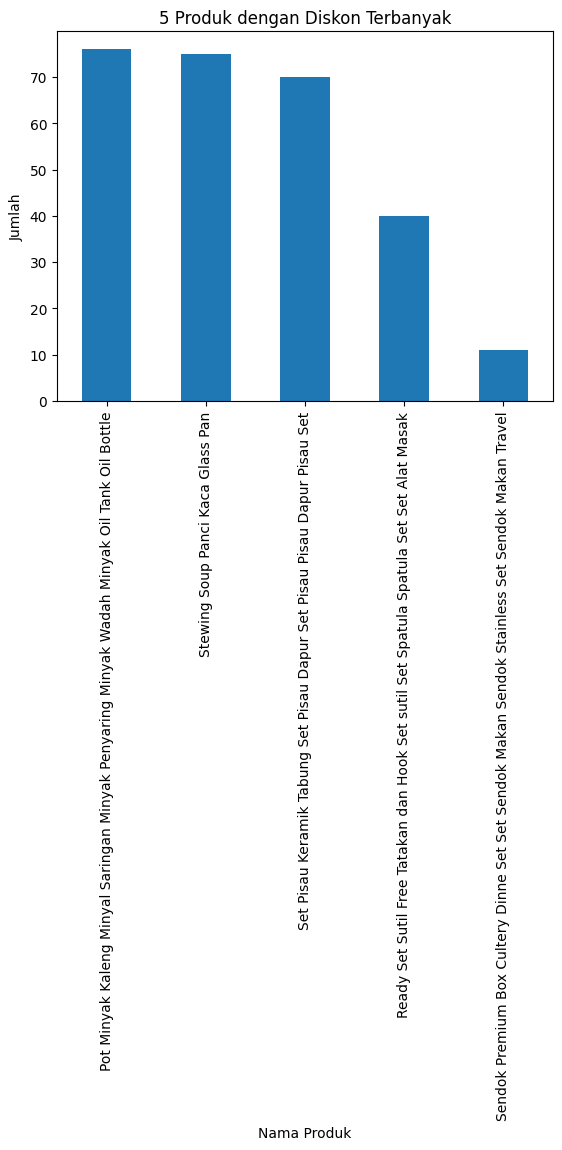

In [ ]:
import matplotlib.pyplot as plt

# Membuat mask untuk produk yang dijual dengan harga diskon
mask = datmin['Harga_Setelah_Diskon'] < datmin['Harga_Awal']

# Menghitung jumlah produk yang dijual dengan harga diskon
jumlah_produk_diskon = datmin.loc[mask, 'Nama_Produk'].value_counts()

# Mendapatkan 5 produk teratas dengan jumlah terbanyak
produk_teratas = jumlah_produk_diskon.nlargest(5)

# Membuat bar plot
produk_teratas.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Produk dengan Diskon Terbanyak')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()


Pertanyaan 6: Siapa pelanggan teratas berdasarkan total pembelian?

In [ ]:
# Menghitung total pembelian per username
total_pembelian_username = datmin.groupby('Username_Pembeli')['Total_Pembayaran'].sum()

# Mendapatkan 5 username dengan total pembelian teratas
username_teratas = total_pembelian_username.nlargest(5)

# Membuat daftar memanjang ke bawah dan berurut bernomor dari 1 sampai 5
for i, (username, total) in enumerate(username_teratas.items(), start=1):
    print(f"{i}\n{username}\n{total}\n")


1
christina.sutedjo
11272590

2
toko_mommee
6253406

3
fransiscataniatrixie
5723554

4
hanoemmarrahmat
5252000

5
jennieshope
4846761



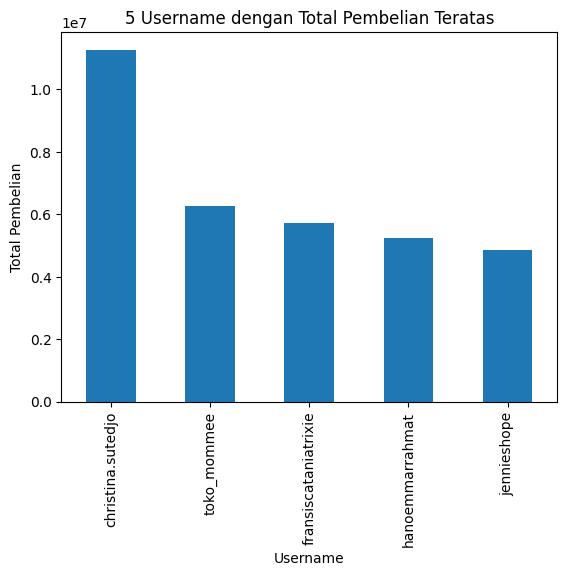

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total pembelian per username
total_pembelian_username = datmin.groupby('Username_Pembeli')['Total_Pembayaran'].sum()

# Mendapatkan 5 username dengan total pembelian teratas
username_teratas = total_pembelian_username.nlargest(5)

# Membuat bar plot
username_teratas.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Username dengan Total Pembelian Teratas')
plt.xlabel('Username')
plt.ylabel('Total Pembelian')

# Menampilkan plot
plt.show()

Pertanyaan 7: Berapa rata-rata total harga produk per provinsi?

In [ ]:
# Menghitung rata-rata total harga produk per provinsi
rata_rata_provinsi = datmin.groupby('Provinsi')['Total_Harga_Produk'].mean()

# Membuat daftar memanjang ke bawah dan berurut bernomor dari 1 sampai 5
for i, (provinsi, rata_rata) in enumerate(rata_rata_provinsi.items(), start=1):
    print(f"{i}\n{provinsi}\n{rata_rata}\n")


1
BALI
169142.85714285713

2
BANGKA BELITUNG
149111.0

3
BANTEN
158985.39416058394

4
BENGKULU
212500.0

5
DI YOGYAKARTA
122285.71428571429

6
DKI JAKARTA
196187.49264705883

7
JAMBI
142666.66666666666

8
JAWA BARAT
171718.6338983051

9
JAWA TENGAH
172547.61904761905

10
JAWA TIMUR
178931.0

11
KALIMANTAN BARAT
194000.0

12
KALIMANTAN SELATAN
179250.0

13
KALIMANTAN TENGAH
152000.0

14
KALIMANTAN TIMUR
157500.0

15
KEPULAUAN RIAU
161363.54545454544

16
LAMPUNG
200833.33333333334

17
NANGGROE ACEH DARUSSALAM (NAD)
191666.66666666666

18
NUSA TENGGARA BARAT (NTB)
165000.0

19
NUSA TENGGARA TIMUR (NTT)
105666.66666666667

20
RIAU
156466.66666666666

21
SULAWESI SELATAN
126171.37142857142

22
SULAWESI TENGAH
95333.33333333333

23
SUMATERA BARAT
164400.0

24
SUMATERA SELATAN
178375.0

25
SUMATERA UTARA
199812.5



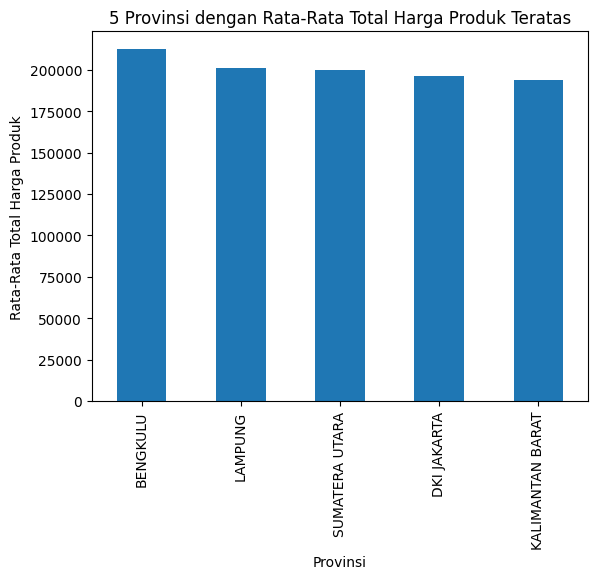

In [ ]:
import matplotlib.pyplot as plt

# Menghitung rata-rata total harga produk per provinsi
rata_rata_provinsi = datmin.groupby('Provinsi')['Total_Harga_Produk'].mean()

# Mendapatkan 5 provinsi dengan rata-rata total harga produk teratas
top_5_provinsi = rata_rata_provinsi.nlargest(5)

# Membuat bar plot
top_5_provinsi.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Provinsi dengan Rata-Rata Total Harga Produk Teratas')
plt.xlabel('Provinsi')
plt.ylabel('Rata-Rata Total Harga Produk')

# Menampilkan plot
plt.show()

Pertanyaan 8: Apa jenis pengiriman yang paling umum digunakan?



In [ ]:
# Menghitung jumlah penggunaan setiap jenis pengiriman
jumlah_pengiriman = datmin['Opsi_Pengiriman'].value_counts()

# Mendapatkan jenis pengiriman yang paling umum digunakan
pengiriman_terbanyak = jumlah_pengiriman.idxmax()
jumlah_terbanyak = jumlah_pengiriman.max()

# Mencetak jenis pengiriman yang paling umum digunakan
print(f"1\n{pengiriman_terbanyak}\n{jumlah_terbanyak}\n")


1
J&T Express
905



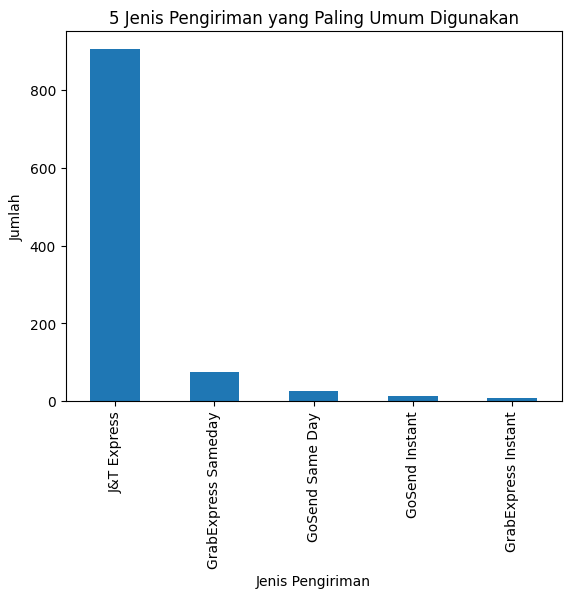

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah penggunaan setiap jenis pengiriman
jumlah_pengiriman = datmin['Opsi_Pengiriman'].value_counts()

# Mendapatkan 5 jenis pengiriman yang paling umum digunakan
top_5_pengiriman = jumlah_pengiriman.head(5)

# Membuat bar plot
top_5_pengiriman.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Jenis Pengiriman yang Paling Umum Digunakan')
plt.xlabel('Jenis Pengiriman')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Pertanyaan 9: Apa produk dengan total diskon terbesar?

In [ ]:
# Menghitung total diskon per produk
total_diskon_produk = datmin.groupby('Nama_Produk')['Total_Diskon'].sum()

# Mendapatkan produk dengan total diskon terbesar
produk_diskon_terbesar = total_diskon_produk.idxmax()
diskon_terbesar = total_diskon_produk.max()

# Mencetak produk dengan total diskon terbesar
print(f"1\n{produk_diskon_terbesar}\n{diskon_terbesar}\n")


1
Ready Set Sutil Free Tatakan dan Hook Set sutil Set Spatula Spatula Set Set Alat Masak
1545000



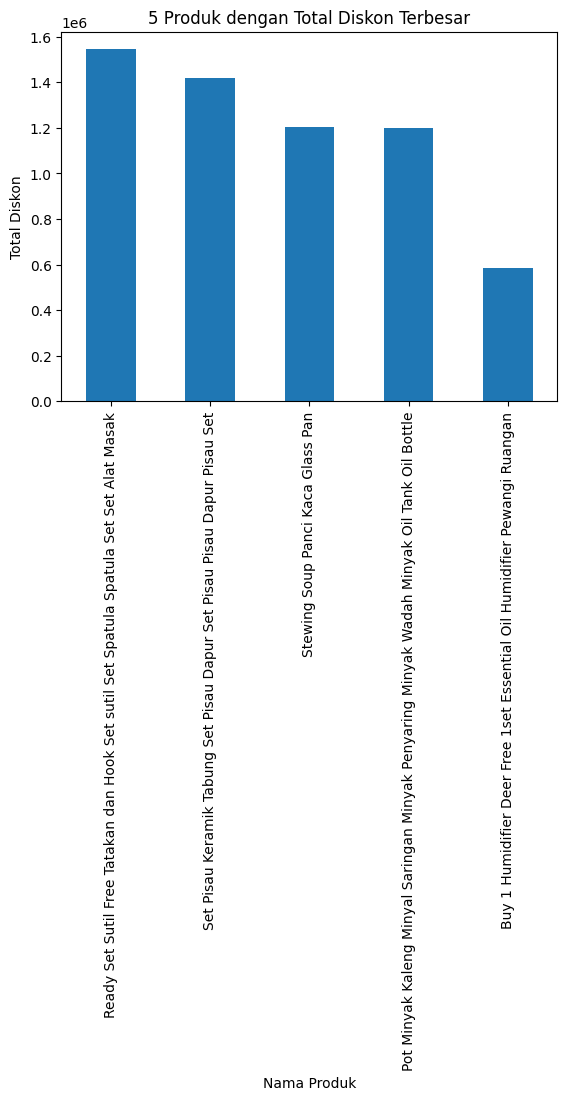

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total diskon per produk
total_diskon_produk = datmin.groupby('Nama_Produk')['Total_Diskon'].sum()

# Mendapatkan 5 produk dengan total diskon terbesar
top_5_produk = total_diskon_produk.nlargest(5)

# Membuat bar plot
top_5_produk.plot(kind='bar')

# Menambahkan judul dan label
plt.title('5 Produk dengan Total Diskon Terbesar')
plt.xlabel('Nama Produk')
plt.ylabel('Total Diskon')

# Menampilkan plot
plt.show()

Pertanyaan 10: Berapa persentase pembayaran yang dilakukan dengan potongan koin shopee dari total pembayaran?


In [ ]:
# Menghitung total pembayaran
total_pembayaran = datmin['Total_Pembayaran'].sum()

# Menghitung total pembayaran yang dilakukan dengan potongan koin shopee
total_potongan_koin_shopee = datmin['Potongan_Koin_Shopee'].sum()

# Menghitung persentase pembayaran yang dilakukan dengan potongan koin shopee
persentase_potongan_koin_shopee = (total_potongan_koin_shopee / total_pembayaran) * 100

# Mencetak persentase pembayaran yang dilakukan dengan potongan koin shopee
print(f"1\nPersentase pembayaran yang dilakukan dengan potongan koin shopee\n{persentase_potongan_koin_shopee:.2f}%\n")


1
Persentase pembayaran yang dilakukan dengan potongan koin shopee
0.69%



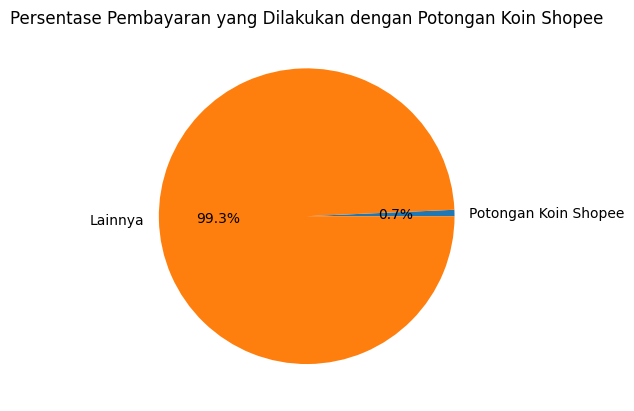

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total pembayaran
total_pembayaran = datmin['Total_Pembayaran'].sum()

# Menghitung total pembayaran yang dilakukan dengan potongan koin shopee
total_potongan_koin_shopee = datmin['Potongan_Koin_Shopee'].sum()

# Menghitung persentase pembayaran yang dilakukan dengan potongan koin shopee
persentase_potongan_koin_shopee = (total_potongan_koin_shopee / total_pembayaran) * 100

# Membuat pie chart
labels = ['Potongan Koin Shopee', 'Lainnya']
sizes = [persentase_potongan_koin_shopee, 100 - persentase_potongan_koin_shopee]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Menambahkan judul
plt.title('Persentase Pembayaran yang Dilakukan dengan Potongan Koin Shopee')

# Menampilkan plot
plt.show()